In [1]:
from usau.reports import USAUResults as Results

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 14})

style_args = {"alpha": 0.5, "markeredgewidth": 0.5}
sns_blue, sns_orange, sns_green, sns_red, *sns_pallete = sns.color_palette()

In [3]:
m2018 = Results.from_event("d1college", 2018, "Men")
m2018.load_from_csvs()

USAUResults<2018_d1college_nationals_men>

In [4]:
w2018 = Results.from_event("d1college", 2018, "Women")
w2018.load_from_csvs()

USAUResults<2018_d1college_nationals_women>

In [5]:
# m2018.rosters

In [6]:
import pandas as pd
from IPython.display import display
from usau.top_n_player_stats import compute_plus_minus
import usau.markdown

def top_n_stats(report, goal_weight=1.0, assist_weight=1.0, d_weight=1.0, turn_weight=-0.5,
                sort_per_game=False, num_players=25, markdown=False):
    roster = report.rosters
    roster["+/-"] = compute_plus_minus(roster,
                                       g_weight=goal_weight,
                                       a_weight=assist_weight,
                                       d_weight=d_weight,
                                       turn_weight=turn_weight)

    # Compute the total number of games played per team, for normalization purposes
    matches = report.match_results.drop_duplicates(subset=["Team", "url"])
    matches["Team Games Played"] = 1
    matches["Team Points Played"] = matches["Score"] + matches["Opp Score"]
    matches = matches[matches["Gs"] > 0] \
        .rename(columns={"Score": "Team Score",
                         "Opp Score": "Team Opp Score",
                        })
    matches = matches.groupby("Team")[["Team Games Played", "Team Points Played",
                                       "Team Score", "Team Opp Score"]].sum()
    roster = roster.join(matches, on="Team")
    roster["+/- per Game"] = roster["+/-"] / roster["Team Games Played"]
    roster["#Games"] = roster["Team Games Played"]

    # if args.keep_teams:
    #   roster = roster.loc[roster["Team"].isin(args.keep_teams)].copy()
    # if args.skip_teams:
    #   roster = roster.loc[~roster["Team"].isin(args.skip_teams)].copy()

    # Sort by +/-
    sort_column = "+/- per Game" if sort_per_game else "+/-"
    res = (roster.sort_values(sort_column, ascending=False)
                 .reset_index(drop=True)
                 .head(num_players)
                 [["Name", "Team",
                   "Goals", "Assists", "Ds", "Turns",
                   "+/-", "+/- per Game", "#Games"]]
                 .rename(columns={"Goals": "Gs", "Assists": "As", "Turns": "Ts",
                                  "+/- per Game": "+/-pg"})
          )
    #     .style \
    #     .bar(subset=['Fantasy Score', 'Goals', 'Ds', '+/-'],
    #          color='rgba(80, 200, 100, 0.5)') \
    #     .bar(subset=['Assists', 'Turns'],
    #          color='rgba(200, 80, 80, 0.5)')

    # if args.bold_teams:
    #   res.loc[res["Team"].isin(args.bold_teams), "Team"] = \
    #       res["Team"].apply(lambda x: "**" + x + "**")

    print("{event} {gender} ({year})"
          .format(year=report.year, event=report, gender=report.gender))
    if markdown:
      with pd.option_context('display.float_format', lambda x: "%.2f" % x):
        print(usau.markdown.pandas_to_markdown(res))
    else:
      with pd.option_context('display.width', 200, 'display.max_columns', 50,
                             'display.max_rows', 200, 'display.precision', 2):
        display(res)
    return res

In [7]:
m2018stats = top_n_stats(m2018, markdown=False, num_players=150)

USAUResults<2018_d1college_nationals_men> men (2018)


,Name,Team,Gs,As,Ds,Ts,+/-,+/-pg,#Games
0,Matthew Cullom,Georgetown,16,13,8,13,30.5,6.10,5
1,John Randolph,Brown,19,8,2,8,25.0,5.00,5
2,Tannor Johnson,Massachusetts,9,15,5,8,25.0,5.00,5
3,Dylan Villeneuve,Brown,10,8,7,6,22.0,4.40,5
4,Steven Benaloh,Washington,6,21,0,10,22.0,4.40,5
5,Michael Ing,Pittsburgh,13,5,5,3,21.5,5.38,4
6,Gus Norrbom,William & Mary,7,20,4,21,20.5,4.10,5
7,Mac Hecht,Brown,5,17,2,9,19.5,3.90,5
8,Christian Boxley,Georgetown,11,9,2,6,19.0,3.80,5
9,Wyatt Mekler,Minnesota,8,12,1,4,19.0,3.80,5


In [8]:
w2018stats = top_n_stats(w2018, markdown=False, num_players=150)

USAUResults<2018_d1college_nationals_women> women (2018)


,Name,Team,Gs,As,Ds,Ts,+/-,+/-pg,#Games
0,Qing (Jenny) Wei,North Carolina,16,14,18,16,40.0,8.00,5
1,Amy Stoddard,Michigan,18,6,11,8,31.0,6.20,5
2,Danielle Byers,West Chester,18,18,12,35,30.5,6.10,5
3,Laura Gerencser,Texas,13,14,8,9,30.5,7.62,4
4,Ashley Powell,North Carolina State,4,33,6,27,29.5,5.90,5
5,Claire Trop,Dartmouth,10,7,13,5,27.5,6.88,4
6,Cara Sieber,Ohio State,6,12,13,9,26.5,5.30,5
7,Ella Hansen,Oregon,8,25,8,29,26.5,5.30,5
8,Domenica Sutherland,Texas,7,24,11,32,26.0,6.50,4
9,Jaclyn Verzuh,Dartmouth,13,6,6,6,22.0,5.50,4


In [9]:
results = {}
for year in (2015, 2016, 2017, 2018):
    for gender in ("Men", "Women"):
        res = Results.from_event("d1college", year, gender)
        if year != 2018:
            res.load_from_csvs("../usau/data2")
        else:
            res.load_from_csvs()
        results[year, gender] = res 

(0, 34.65)

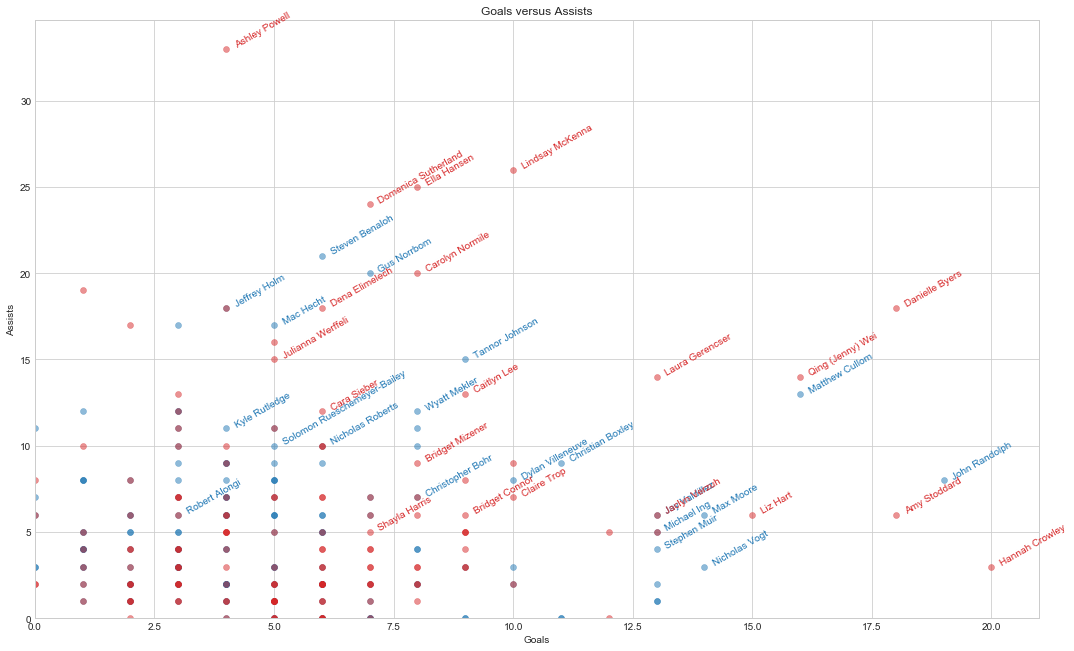

In [10]:
# Plot goals versus assists, labelling the top 20 performers of both genders
fig, ax = plt.subplots(figsize=(18, 11))
ax.plot(m2018stats.Gs, m2018stats.As, "o", color=sns_blue, **style_args)
ax.plot(w2018stats.Gs, w2018stats.As, "o", color=sns_red, **style_args)
ax.set_xlabel("Goals")
ax.set_ylabel("Assists")
ax.set_title("Goals versus Assists")
for _, row in m2018stats.head(20).iterrows():
  adjustment = 0.2
  ax.annotate(row["Name"], xy=(row["Gs"] + adjustment, row["As"] + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=sns_blue)
for _, row in w2018stats.head(20).iterrows():
  adjustment = 0.2
  ax.annotate(row["Name"], xy=(row["Gs"] + adjustment, row["As"] + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=sns_red)
ax.set_xlim(0)
ax.set_ylim(0)

In [11]:
m2018stats["Gender"] = "Men"
w2018stats["Gender"] = "Women"
stats2018 = pd.concat([m2018stats, w2018stats])

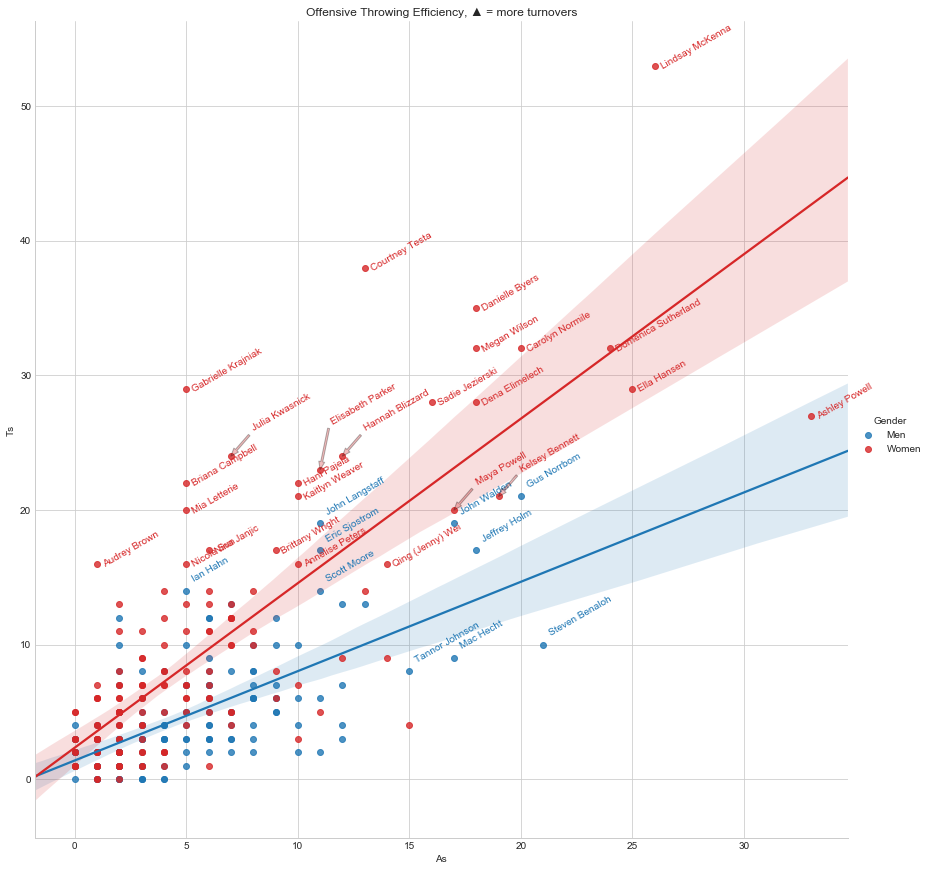

In [12]:
# Plot As versus turns, labelling the top values of both genders
# Using the top 500 players by fantasy (at least 2 scores/assists) to prune some of the null data
g = sns.lmplot("As", "Ts", stats2018.head(500), hue="Gender",
               size=12, palette={"Men": sns_blue, "Women": sns_red})
g.ax.set_title(u"Offensive Throwing Efficiency, ▲ = more turnovers")
for _, row in m2018stats[(m2018stats.As > 13) |
                         (m2018stats.Ts > 13)].iterrows():
  adjustment = 0.3
  xy = (row["As"] + adjustment, row["Ts"] + 0.8)
  g.ax.annotate(row["Name"], xy=xy,
                ha='left', va='center', rotation=30, wrap=True, color=sns_blue)
for _, row in w2018stats[(w2018stats.As > 15) |
                         (w2018stats.Ts > 15)].iterrows():
  adj = 0.3
  x = row["As"]
  y = row["Ts"]
  # Couple of special cases for people whose names are obscured
  if row["Name"] in ("Julia Kwasnick", "Kelsey Bennett", "Maya Powell", "Hannah Blizzard"):
    g.ax.annotate(row["Name"], xy=(x, y), xytext=(x + 1.0, y + 2.0),
                  arrowprops=dict(facecolor=sns_red, headwidth=6, headlength=8, width=2.0, alpha=0.3),
                  ha='left', va='center', rotation=30, wrap=True, color=sns_red)
  elif row["Name"] in ("Elisabeth Parker",):
    g.ax.annotate(row["Name"], xy=(x, y), xytext=(x + 0.5, y + 3.5),
                  arrowprops=dict(facecolor=sns_red, headwidth=6, headlength=8, width=2.0, alpha=0.3),
                  ha='left', va='center', rotation=30, wrap=True, color=sns_red)
  elif row["Name"] in ("Stephanie Williams",):
    g.ax.annotate(row["Name"], xy=(x, y), xytext=(x + 1.4, y),
                  arrowprops=dict(facecolor=sns_red, headwidth=6, headlength=8, width=2.0, alpha=0.3),
                  ha='left', va='center', rotation=30, wrap=True, color=sns_red)
  else:  
    g.ax.annotate(row["Name"], xy=(x + adj, y + adj - 0.4),
                  ha='left', va='center', rotation=30, wrap=True, color=sns_red)

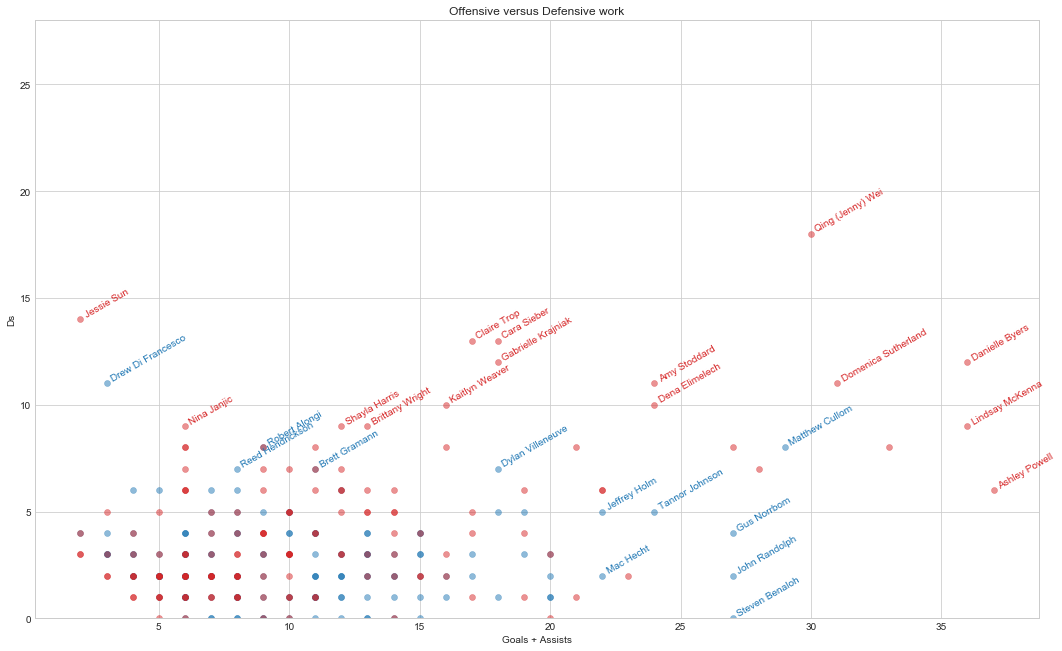

In [13]:
# Plot goals+assists versus Ds, labelling the top 20 performers of both genders
fig, ax = plt.subplots(figsize=(18, 11))
ax.plot(m2018stats.Gs + m2018stats.As, m2018stats.Ds, "o", color=sns_blue, **style_args)
ax.plot(w2018stats.Gs + w2018stats.As, w2018stats.Ds, "o", color=sns_red, **style_args)
ax.set_xlabel("Goals + Assists")
ax.set_ylabel("Ds")
ax.set_title("Offensive versus Defensive work")
ax.set_ylim(0, 28)
for _, row in w2018stats[(w2018stats.Ds > 8) |
                         (w2018stats.Gs + w2018stats.As > 35)].iterrows():
  adjustment = 0.2
  x, y = row["Gs"] + row["As"], row["Ds"]
  color = sns_red
  ax.annotate(row["Name"], xy=(x + adjustment,y  + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=color)
for _, row in m2018stats[(m2018stats.Ds > 6) |
                         (m2018stats.Gs + m2018stats.As > 20)].iterrows():
  adjustment = 0.2
  x, y = row["Gs"] + row["As"], row["Ds"]
  color = sns_blue
  ax.annotate(row["Name"], xy=(x + adjustment,y  + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=color)